In [1]:

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.layers import Bidirectional
from keras.models import Model
from keras.layers import LSTM, GRU, SimpleRNN,Flatten ,Input,Add, Concatenate,Reshape

from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN
import glob
from datetime import datetime
from keras.layers import Dropout
#import pyemd
%matplotlib inline


Using TensorFlow backend.
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [6]:
import glob

all_data = pd.DataFrame()
#path = 'C:\\Users\\kuruparans\\Documents\\ATM_CashFlow\\ATM_cashflow_prediction\\atm_data_m2.csv'
df=pd.read_csv('C:\\Users\\kuruparans\\Documents\\ATM_CashFlow\\ATM_cashflow_prediction\\atm_data_m2.csv')
#for f in glob.glob(path):
#    df = pd.read_excel(f, sheet_name=None, ignore_index=True, usecols=['windspd','month','day','hour'])
#    cdf = pd.concat(df.values())
#    all_data = all_data.append(cdf,ignore_index=True)
#print(all_data)
dataframe=df

In [7]:
df.head

<bound method NDFrame.head of       Unnamed: 0        atm_name    weekday festival_religion working_day  \
0             11  Mount Road ATM     MONDAY                NH           W   
1             16  Mount Road ATM    TUESDAY                NH           W   
2             21  Mount Road ATM  WEDNESDAY                NH           W   
3             26  Mount Road ATM   THURSDAY                NH           W   
4             31  Mount Road ATM     FRIDAY                NH           W   
...          ...             ...        ...               ...         ...   
2239       11565  Mount Road ATM     MONDAY                NH           W   
2240       11570  Mount Road ATM    TUESDAY                NH           W   
2241       11575  Mount Road ATM  WEDNESDAY                NH           W   
2242       11580  Mount Road ATM   THURSDAY                NH           W   
2243       11585  Mount Road ATM     FRIDAY                 H           H   

     holiday_sequence  day  month  year  prev

In [8]:
df['atm_name']

0       Mount Road ATM
1       Mount Road ATM
2       Mount Road ATM
3       Mount Road ATM
4       Mount Road ATM
             ...      
2239    Mount Road ATM
2240    Mount Road ATM
2241    Mount Road ATM
2242    Mount Road ATM
2243    Mount Road ATM
Name: atm_name, Length: 2244, dtype: object

In [9]:
dataframe['date_time']= dataframe['year']+(dataframe['month'])*12+(dataframe['day'])
dataframe=dataframe[['date_time','total_amount_withdrawn'] ]
dataframe=dataframe.dropna()

In [10]:
#dataframe

In [11]:
''' Dividing data in test and train sets '''
dataset = dataframe.values
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1683 561


In [12]:
#dataset

In [13]:
''' Helper to create time frames with look backs '''
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 1]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 1])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [14]:
''' Creating time frames with look backs '''
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

1659
537


In [15]:
#trainY

In [16]:
#trainX

In [17]:
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [18]:
trainX.shape



(1659, 1, 24)

W0809 15:44:49.510520  8992 deprecation_wrapper.py:119] From C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 15:44:49.530630  8992 deprecation_wrapper.py:119] From C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(24, input_shape=(1, 24), kernel_initializer="glorot_uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0809 15:44:49.540649  8992 deprecation_wrapper.py:119] From C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\keras\backend\tensorflow_ba

Train on 1659 samples, validate on 537 samples
Epoch 1/300
1659/1659 [==============================] - 1s 325us/step - loss: 502082.3896 - val_loss: 241300.0960
Epoch 2/300
1659/1659 [==============================] - 0s 40us/step - loss: 252216.3068 - val_loss: 210351.0686
Epoch 3/300
1659/1659 [==============================] - 0s 28us/step - loss: 218542.4118 - val_loss: 187255.3113
Epoch 4/300
1659/1659 [==============================] - 0s 42us/step - loss: 195795.6060 - val_loss: 170552.6212
Epoch 5/300
1659/1659 [==============================] - 0s 38us/step - loss: 181966.0316 - val_loss: 163996.4921
Epoch 6/300
1659/1659 [==============================] - 0s 32us/step - loss: 173932.8594 - val_loss: 157114.8333
Epoch 7/300
1659/1659 [==============================] - 0s 42us/step - loss: 166855.4152 - val_loss: 150492.0401
Epoch 8/300
1659/1659 [==============================] - 0s 30us/step - loss: 161431.4252 - val_loss: 145525.4168
Epoch 9/300
1659/1659 [=================

Epoch 72/300
1659/1659 [==============================] - 0s 35us/step - loss: 148207.2098 - val_loss: 140823.5741
Epoch 73/300
1659/1659 [==============================] - 0s 23us/step - loss: 147858.4609 - val_loss: 140142.8918
Epoch 74/300
1659/1659 [==============================] - 0s 28us/step - loss: 147906.3387 - val_loss: 140780.5691
Epoch 75/300
1659/1659 [==============================] - 0s 32us/step - loss: 147993.8387 - val_loss: 140876.1264
Epoch 76/300
1659/1659 [==============================] - 0s 28us/step - loss: 147994.5999 - val_loss: 140928.6018
Epoch 77/300
1659/1659 [==============================] - 0s 20us/step - loss: 148318.4344 - val_loss: 140909.7729
Epoch 78/300
1659/1659 [==============================] - 0s 31us/step - loss: 148019.1264 - val_loss: 141212.9198
Epoch 79/300
1659/1659 [==============================] - 0s 33us/step - loss: 148126.5971 - val_loss: 140159.6377
Epoch 80/300
1659/1659 [==============================] - 0s 28us/step - loss: 1

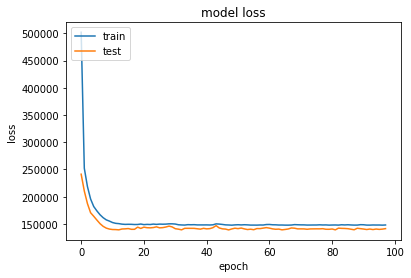

In [19]:
X_input = Input(shape=(trainX.shape[1], trainX.shape[2]))

layer=Dense(120,init='glorot_uniform', input_shape=(trainX.shape[1], trainX.shape[2]))(X_input)
layer.trainable=False

layer2=Dense(12,init='glorot_uniform')(layer)
layer2.trainable=True
res0=Concatenate(axis=-1)([layer2,X_input])
res0.trainable=True
layer3=Dense(12,init='glorot_uniform')(layer2)
layer3.trainable=True
res=Concatenate(axis=-1)([layer3,X_input])
res.trainable=True
#model.add(res)
flat=Flatten()(res)
layer4=Dense(1,init='glorot_uniform')(flat)
layer4.trainable=True
#model.add(layer4)
model = Model(inputs=X_input, outputs=layer4)
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Root mean squared error Train: 192730.971
Root mean squared error Test: 185801.128


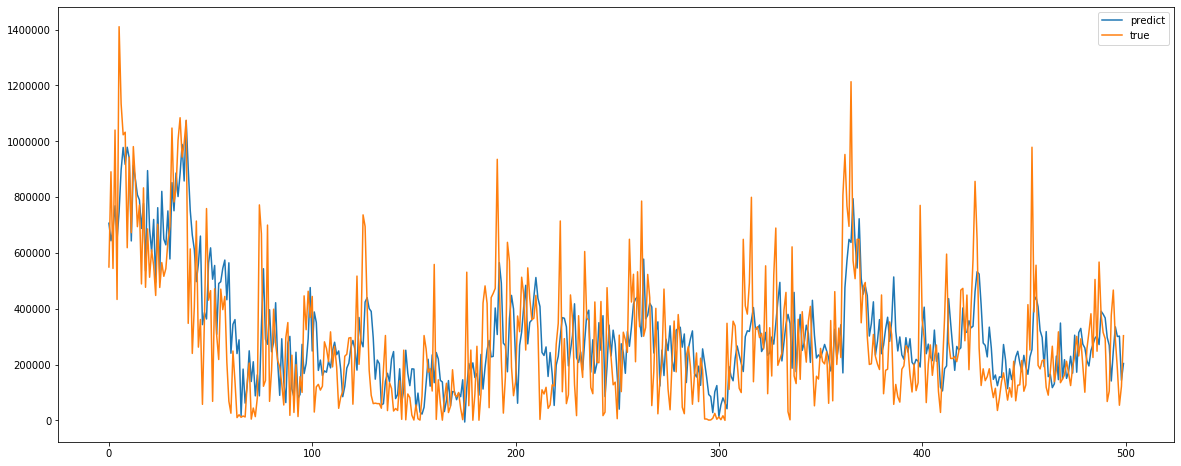

Variance : 0.387
Mean absolute error Train: 149468.538
Mean absolute error Test: 141315.468


In [20]:
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [21]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


In [22]:
#changing loss funtion to RMSE 

W0809 15:45:20.918059  8992 deprecation.py:323] From C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1659 samples, validate on 537 samples
Epoch 1/300
1659/1659 [==============================] - 1s 488us/step - loss: 623149.8382 - acc: 0.0000e+00 - val_loss: 346706.1597 - val_acc: 0.0000e+00
Epoch 2/300
1659/1659 [==============================] - 0s 42us/step - loss: 623149.6708 - acc: 0.0000e+00 - val_loss: 346706.0682 - val_acc: 0.0000e+00
Epoch 3/300
1659/1659 [==============================] - 0s 42us/step - loss: 623149.5417 - acc: 0.0000e+00 - val_loss: 346705.9738 - val_acc: 0.0000e+00
Epoch 4/300
1659/1659 [==============================] - 0s 43us/step - loss: 623149.3932 - acc: 0.0000e+00 - val_loss: 346705.8720 - val_acc: 0.0000e+00
Epoch 5/300
1659/1659 [==============================] - 0s 48us/step - loss: 623149.2462 - acc: 0.0000e+00 - val_loss: 346705.7921 - val_acc: 0.0000e+00
Epoch 6/300
1659/1659 [==============================] - 0s 55us/step - loss: 623149.1027 - acc: 0.0000e+00 - val_loss: 346705.6788 - val_acc: 0.0000e+00
Epoch 7/300
1659/1659 [=====

Epoch 106/300
1659/1659 [==============================] - 0s 60us/step - loss: 623134.7928 - acc: 0.0000e+00 - val_loss: 346696.0179 - val_acc: 0.0000e+00
Epoch 107/300
1659/1659 [==============================] - 0s 51us/step - loss: 623134.6584 - acc: 0.0000e+00 - val_loss: 346695.9060 - val_acc: 0.0000e+00
Epoch 108/300
1659/1659 [==============================] - 0s 48us/step - loss: 623134.5117 - acc: 0.0000e+00 - val_loss: 346695.8232 - val_acc: 0.0000e+00
Epoch 109/300
1659/1659 [==============================] - 0s 46us/step - loss: 623134.3798 - acc: 0.0000e+00 - val_loss: 346695.7200 - val_acc: 0.0000e+00
Epoch 110/300
1659/1659 [==============================] - 0s 46us/step - loss: 623134.2359 - acc: 0.0000e+00 - val_loss: 346695.6314 - val_acc: 0.0000e+00
Epoch 111/300
1659/1659 [==============================] - 0s 51us/step - loss: 623134.0855 - acc: 0.0000e+00 - val_loss: 346695.5268 - val_acc: 0.0000e+00
Epoch 112/300
1659/1659 [==============================] - 0s 48

Epoch 158/300
1659/1659 [==============================] - 0s 51us/step - loss: 623127.3803 - acc: 0.0000e+00 - val_loss: 346690.9771 - val_acc: 0.0000e+00
Epoch 159/300
1659/1659 [==============================] - 0s 53us/step - loss: 623127.2205 - acc: 0.0000e+00 - val_loss: 346690.8870 - val_acc: 0.0000e+00
Epoch 160/300
1659/1659 [==============================] - 0s 47us/step - loss: 623127.0753 - acc: 0.0000e+00 - val_loss: 346690.7832 - val_acc: 0.0000e+00
Epoch 161/300
1659/1659 [==============================] - 0s 48us/step - loss: 623126.9318 - acc: 0.0000e+00 - val_loss: 346690.7142 - val_acc: 0.0000e+00
Epoch 162/300
1659/1659 [==============================] - 0s 47us/step - loss: 623126.7839 - acc: 0.0000e+00 - val_loss: 346690.6117 - val_acc: 0.0000e+00
Epoch 163/300
1659/1659 [==============================] - 0s 50us/step - loss: 623126.6454 - acc: 0.0000e+00 - val_loss: 346690.4976 - val_acc: 0.0000e+00
Epoch 164/300
1659/1659 [==============================] - 0s 51

1659/1659 [==============================] - 0s 38us/step - loss: 623112.4932 - acc: 0.0000e+00 - val_loss: 346680.9283 - val_acc: 0.0000e+00
Epoch 263/300
1659/1659 [==============================] - 0s 43us/step - loss: 623112.3556 - acc: 0.0000e+00 - val_loss: 346680.8317 - val_acc: 0.0000e+00
Epoch 264/300
1659/1659 [==============================] - 0s 42us/step - loss: 623112.2089 - acc: 0.0000e+00 - val_loss: 346680.7343 - val_acc: 0.0000e+00
Epoch 265/300
1659/1659 [==============================] - 0s 41us/step - loss: 623112.0604 - acc: 0.0000e+00 - val_loss: 346680.6377 - val_acc: 0.0000e+00
Epoch 266/300
1659/1659 [==============================] - 0s 47us/step - loss: 623111.9184 - acc: 0.0000e+00 - val_loss: 346680.5374 - val_acc: 0.0000e+00
Epoch 267/300
1659/1659 [==============================] - 0s 65us/step - loss: 623111.7677 - acc: 0.0000e+00 - val_loss: 346680.4430 - val_acc: 0.0000e+00
Epoch 268/300
1659/1659 [==============================] - 0s 46us/step - loss

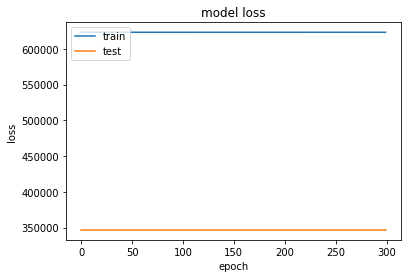

Root mean squared error Train: 626479.227
Root mean squared error Test: 371788.836


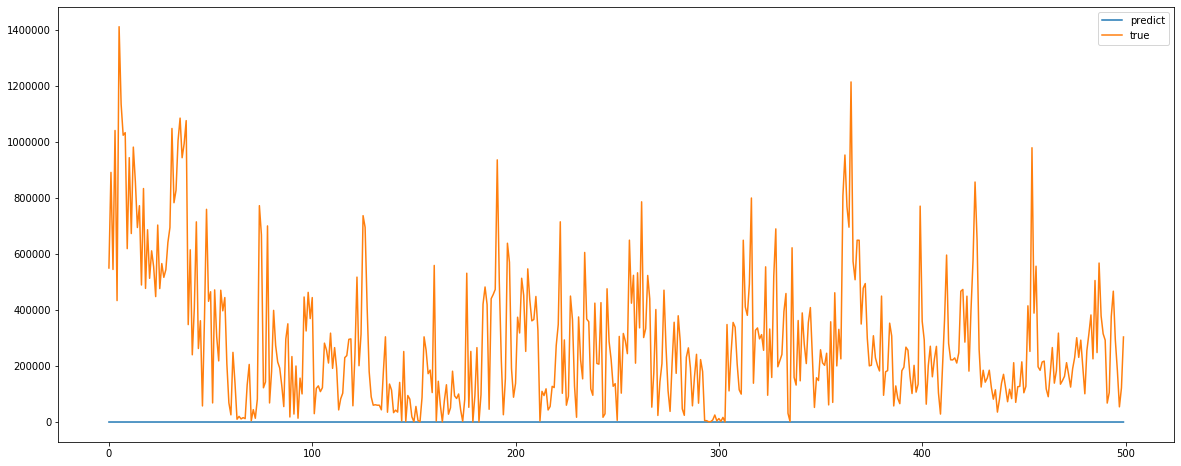

Variance : -1.453
Mean absolute error Train: 588422.472
Mean absolute error Test: 286162.074


In [23]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model = Sequential()
model.add(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [24]:
#GRU Unit

Train on 1659 samples, validate on 537 samples
Epoch 1/300
1659/1659 [==============================] - 1s 539us/step - loss: 588467.8814 - val_loss: 286197.0292
Epoch 2/300
1659/1659 [==============================] - 0s 41us/step - loss: 588467.5359 - val_loss: 286196.7687
Epoch 3/300
1659/1659 [==============================] - 0s 50us/step - loss: 588467.1801 - val_loss: 286196.5249
Epoch 4/300
1659/1659 [==============================] - 0s 44us/step - loss: 588466.8400 - val_loss: 286196.2819
Epoch 5/300
1659/1659 [==============================] - 0s 41us/step - loss: 588466.5055 - val_loss: 286196.0199
Epoch 6/300
1659/1659 [==============================] - 0s 53us/step - loss: 588466.1644 - val_loss: 286195.7576
Epoch 7/300
1659/1659 [==============================] - 0s 51us/step - loss: 588465.8164 - val_loss: 286195.5240
Epoch 8/300
1659/1659 [==============================] - 0s 46us/step - loss: 588465.4759 - val_loss: 286195.2657
Epoch 9/300
1659/1659 [=================

Epoch 142/300
1659/1659 [==============================] - 0s 44us/step - loss: 588419.3788 - val_loss: 286161.4453
Epoch 143/300
1659/1659 [==============================] - 0s 45us/step - loss: 588419.0371 - val_loss: 286161.1891
Epoch 144/300
1659/1659 [==============================] - 0s 39us/step - loss: 588418.6913 - val_loss: 286160.9395
Epoch 145/300
1659/1659 [==============================] - 0s 41us/step - loss: 588418.3559 - val_loss: 286160.6877
Epoch 146/300
1659/1659 [==============================] - 0s 49us/step - loss: 588417.9959 - val_loss: 286160.4243
Epoch 147/300
1659/1659 [==============================] - 0s 45us/step - loss: 588417.6473 - val_loss: 286160.1823
Epoch 148/300
1659/1659 [==============================] - 0s 42us/step - loss: 588417.3182 - val_loss: 286159.9277
Epoch 149/300
1659/1659 [==============================] - 0s 50us/step - loss: 588416.9673 - val_loss: 286159.6744
Epoch 150/300
1659/1659 [==============================] - 0s 38us/step 

Epoch 283/300
1659/1659 [==============================] - 0s 50us/step - loss: 588370.8903 - val_loss: 286125.8569
Epoch 284/300
1659/1659 [==============================] - 0s 51us/step - loss: 588370.5379 - val_loss: 286125.5950
Epoch 285/300
1659/1659 [==============================] - 0s 56us/step - loss: 588370.1959 - val_loss: 286125.3439
Epoch 286/300
1659/1659 [==============================] - 0s 60us/step - loss: 588369.8444 - val_loss: 286125.0994
Epoch 287/300
1659/1659 [==============================] - 0s 57us/step - loss: 588369.4986 - val_loss: 286124.8418
Epoch 288/300
1659/1659 [==============================] - 0s 47us/step - loss: 588369.1617 - val_loss: 286124.5834
Epoch 289/300
1659/1659 [==============================] - 0s 63us/step - loss: 588368.8153 - val_loss: 286124.3273
Epoch 290/300
1659/1659 [==============================] - 0s 52us/step - loss: 588368.4732 - val_loss: 286124.0828
Epoch 291/300
1659/1659 [==============================] - 0s 67us/step 

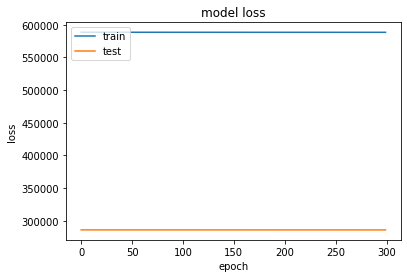

In [25]:
model = Sequential()
model.add(GRU(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Root mean squared error Train: 626426.103
Root mean squared error Test: 371754.942


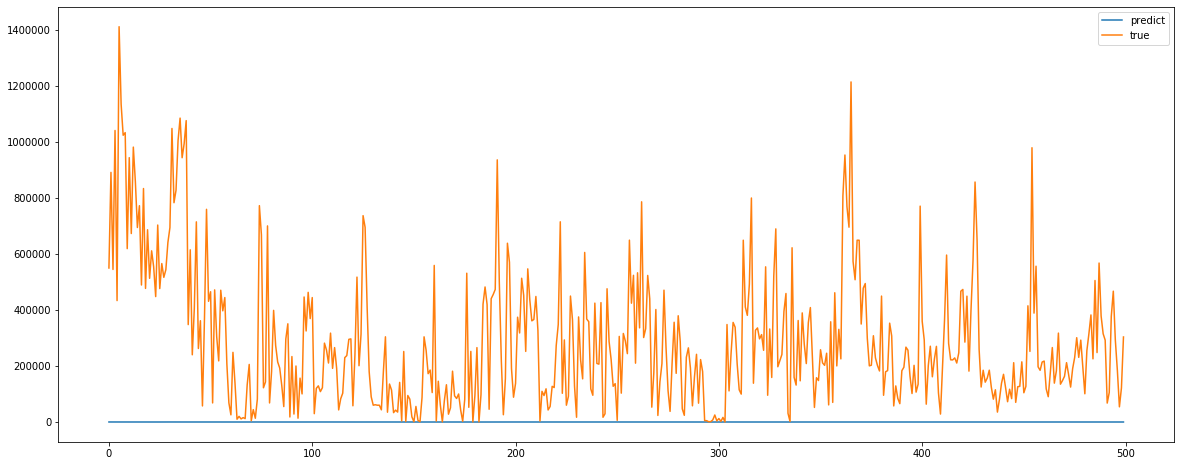

Variance : -1.453
Mean absolute error Train: 588364.854
Mean absolute error Test: 286121.556


In [26]:
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))


Train on 1659 samples, validate on 537 samples
Epoch 1/300
1659/1659 [==============================] - 1s 571us/step - loss: 623150.4015 - acc: 0.0000e+00 - val_loss: 346706.5072 - val_acc: 0.0000e+00
Epoch 2/300
1659/1659 [==============================] - 0s 26us/step - loss: 623149.9907 - acc: 0.0000e+00 - val_loss: 346706.2587 - val_acc: 0.0000e+00
Epoch 3/300
1659/1659 [==============================] - 0s 46us/step - loss: 623149.6380 - acc: 0.0000e+00 - val_loss: 346705.9833 - val_acc: 0.0000e+00
Epoch 4/300
1659/1659 [==============================] - 0s 39us/step - loss: 623149.2800 - acc: 0.0000e+00 - val_loss: 346705.7348 - val_acc: 0.0000e+00
Epoch 5/300
1659/1659 [==============================] - 0s 55us/step - loss: 623148.8955 - acc: 0.0000e+00 - val_loss: 346705.4820 - val_acc: 0.0000e+00
Epoch 6/300
1659/1659 [==============================] - 0s 49us/step - loss: 623148.5635 - acc: 0.0000e+00 - val_loss: 346705.2117 - val_acc: 0.0000e+00
Epoch 7/300
1659/1659 [=====

Epoch 106/300
1659/1659 [==============================] - 0s 51us/step - loss: 623112.2320 - acc: 0.0000e+00 - val_loss: 346679.6068 - val_acc: 0.0000e+00
Epoch 107/300
1659/1659 [==============================] - 0s 45us/step - loss: 623111.8755 - acc: 0.0000e+00 - val_loss: 346679.3321 - val_acc: 0.0000e+00
Epoch 108/300
1659/1659 [==============================] - 0s 46us/step - loss: 623111.5174 - acc: 0.0000e+00 - val_loss: 346679.0865 - val_acc: 0.0000e+00
Epoch 109/300
1659/1659 [==============================] - 0s 48us/step - loss: 623111.1317 - acc: 0.0000e+00 - val_loss: 346678.8264 - val_acc: 0.0000e+00
Epoch 110/300
1659/1659 [==============================] - 0s 60us/step - loss: 623110.7872 - acc: 0.0000e+00 - val_loss: 346678.5648 - val_acc: 0.0000e+00
Epoch 111/300
1659/1659 [==============================] - 0s 57us/step - loss: 623110.4147 - acc: 0.0000e+00 - val_loss: 346678.3207 - val_acc: 0.0000e+00
Epoch 112/300
1659/1659 [==============================] - 0s 42

1659/1659 [==============================] - 0s 46us/step - loss: 623074.4681 - acc: 0.0000e+00 - val_loss: 346652.9512 - val_acc: 0.0000e+00
Epoch 211/300
1659/1659 [==============================] - 0s 49us/step - loss: 623074.0900 - acc: 0.0000e+00 - val_loss: 346652.6911 - val_acc: 0.0000e+00
Epoch 212/300
1659/1659 [==============================] - 0s 44us/step - loss: 623073.7376 - acc: 0.0000e+00 - val_loss: 346652.4375 - val_acc: 0.0000e+00
Epoch 213/300
1659/1659 [==============================] - 0s 55us/step - loss: 623073.3780 - acc: 0.0000e+00 - val_loss: 346652.1796 - val_acc: 0.0000e+00
Epoch 214/300
1659/1659 [==============================] - 0s 46us/step - loss: 623073.0055 - acc: 0.0000e+00 - val_loss: 346651.9238 - val_acc: 0.0000e+00
Epoch 215/300
1659/1659 [==============================] - 0s 54us/step - loss: 623072.6518 - acc: 0.0000e+00 - val_loss: 346651.6812 - val_acc: 0.0000e+00
Epoch 216/300
1659/1659 [==============================] - 0s 50us/step - loss

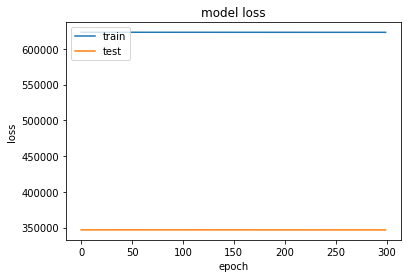

In [27]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model = Sequential()
model.add(GRU(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=1, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Root mean squared error Train: 626414.138
Root mean squared error Test: 371742.449


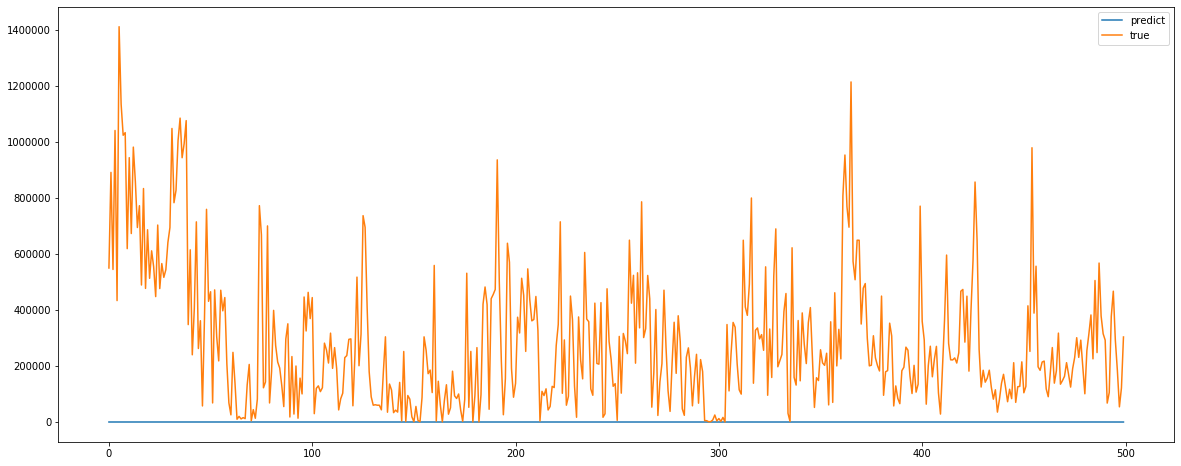

Variance : -1.453
Mean absolute error Train: 588354.620
Mean absolute error Test: 286107.911


In [28]:
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [29]:
#Simple RNN Unit

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 24)                1176      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 25        
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'loss'])


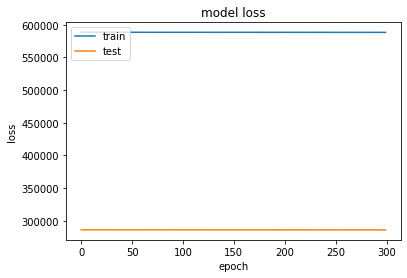

Root mean squared error Train: 626342.391
Root mean squared error Test: 371704.185


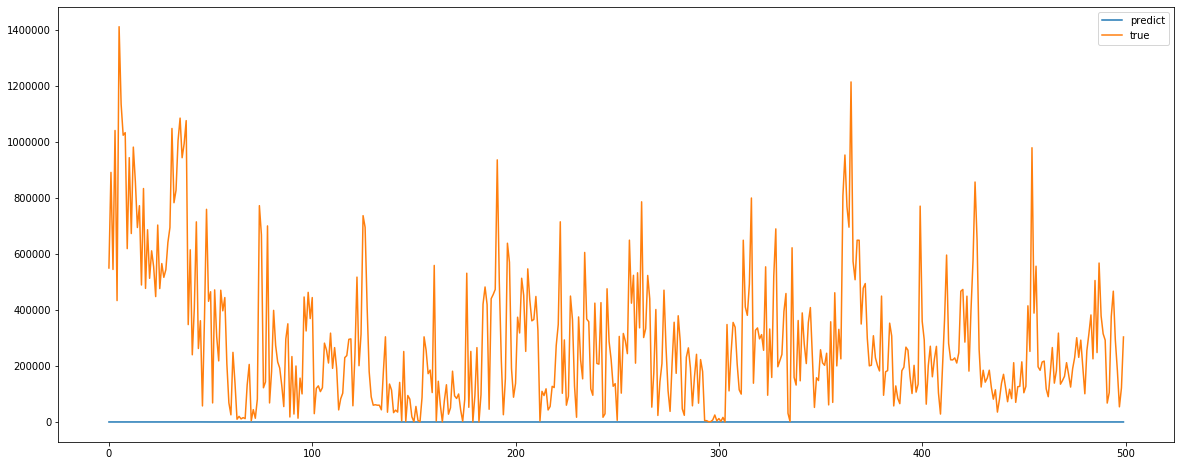

Variance : -1.452
Mean absolute error Train: 588277.328
Mean absolute error Test: 286059.208


In [30]:
model = Sequential()
model.add(SimpleRNN(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 24)                1176      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


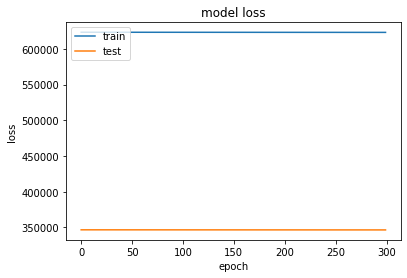

Root mean squared error Train: 626323.313
Root mean squared error Test: 371679.809


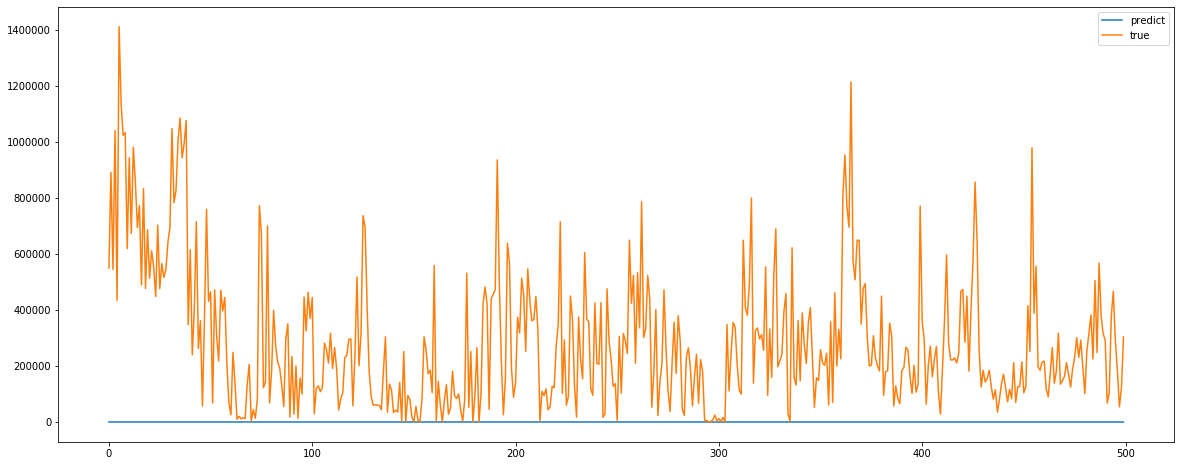

Variance : -1.452
Mean absolute error Train: 588257.879
Mean absolute error Test: 286028.464


In [31]:
 from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
model = Sequential()
model.add(SimpleRNN(look_back, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [32]:
#stacklstm

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 24)             4704      
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                1400      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 6,115
Trainable params: 6,115
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'loss'])


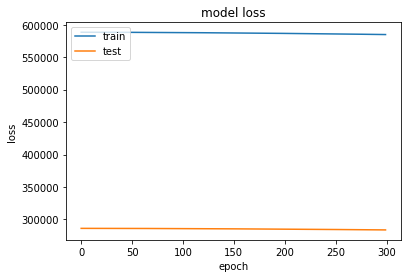

Root mean squared error Train: 623144.903
Root mean squared error Test: 369771.767


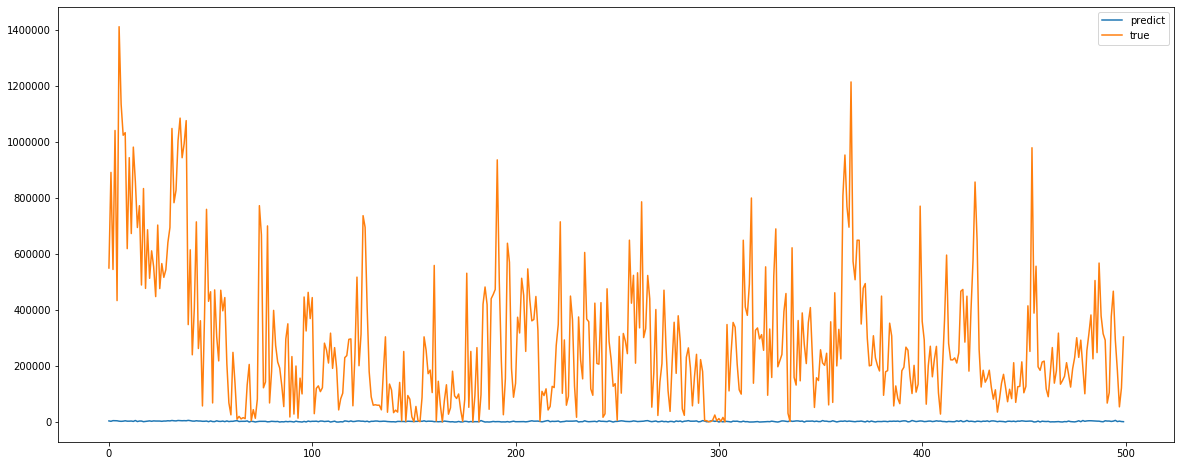

Variance : -1.427
Mean absolute error Train: 584899.716
Mean absolute error Test: 283805.948


In [33]:
model = Sequential()
model.add(LSTM(look_back,return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(10, activation='relu'))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 48)                9408      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 49        
Total params: 9,457
Trainable params: 9,457
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'loss'])


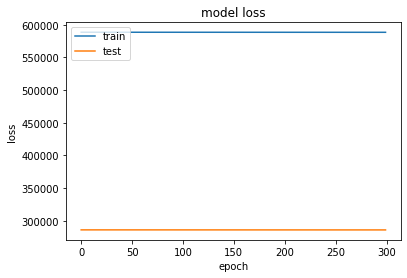

Root mean squared error Train: 626440.729
Root mean squared error Test: 371758.570


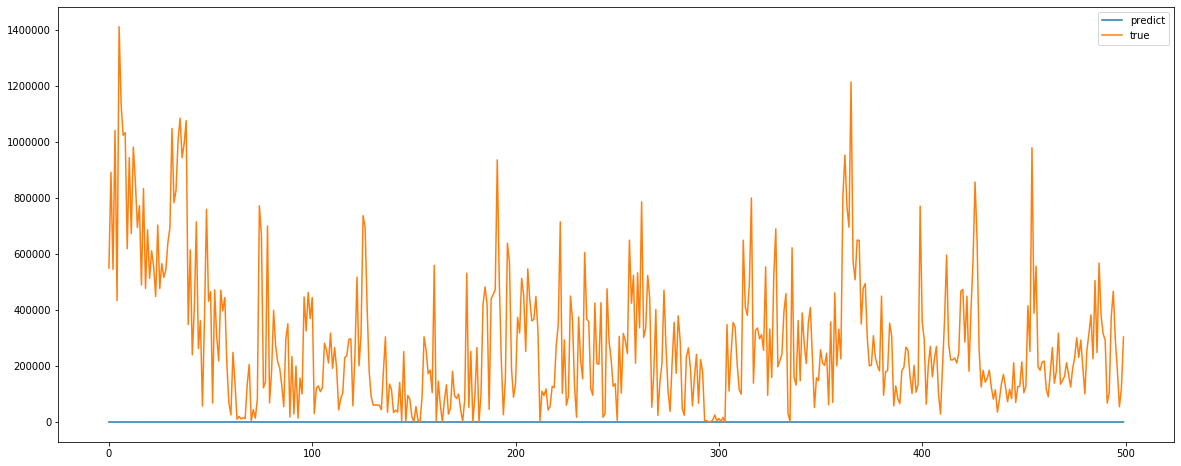

Variance : -1.453
Mean absolute error Train: 588381.084
Mean absolute error Test: 286123.320


In [34]:
model = Sequential()
model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

W0809 15:48:24.013911  8992 deprecation_wrapper.py:119] From C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 12, 64)      128       
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 6, 64)       0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 384)         0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                87000     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 87,179
Trainable params: 87,179
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'loss'])


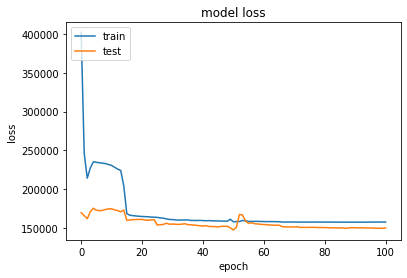

Root mean squared error Train: 201337.319
Root mean squared error Test: 195124.215


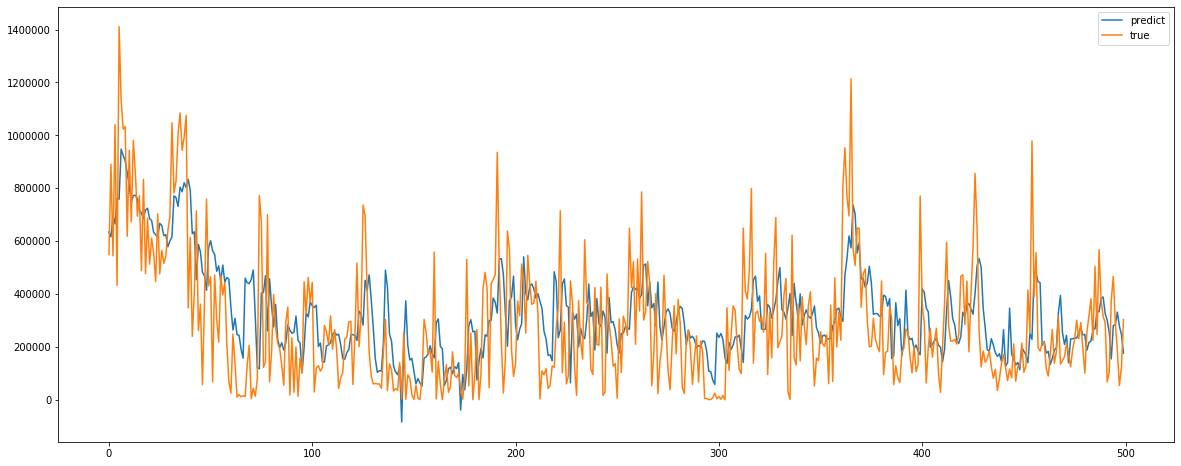

Variance : 0.324
Mean absolute error Train: 156925.374
Mean absolute error Test: 150217.123


In [35]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 2,12,1))
testX = np.reshape(testX, (testX.shape[0], 2,12,1))
model = Sequential()
#model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'),  input_shape=(None ,trainX.shape[2], trainX.shape[3])))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [36]:
''' Creating time frames with look backs '''
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

1659
537


In [37]:
trainX.shape

(1659, 24)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 11, 64)         33536     
_________________________________________________________________
flatten_3 (Flatten)          (None, 704)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 705       
Total params: 34,241
Trainable params: 34,241
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'loss'])


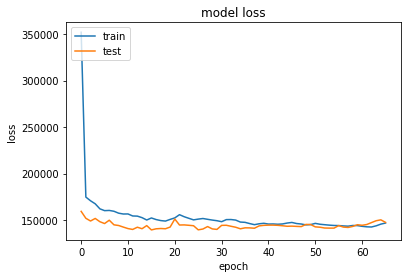

Root mean squared error Train: 187977.290
Root mean squared error Test: 191776.251


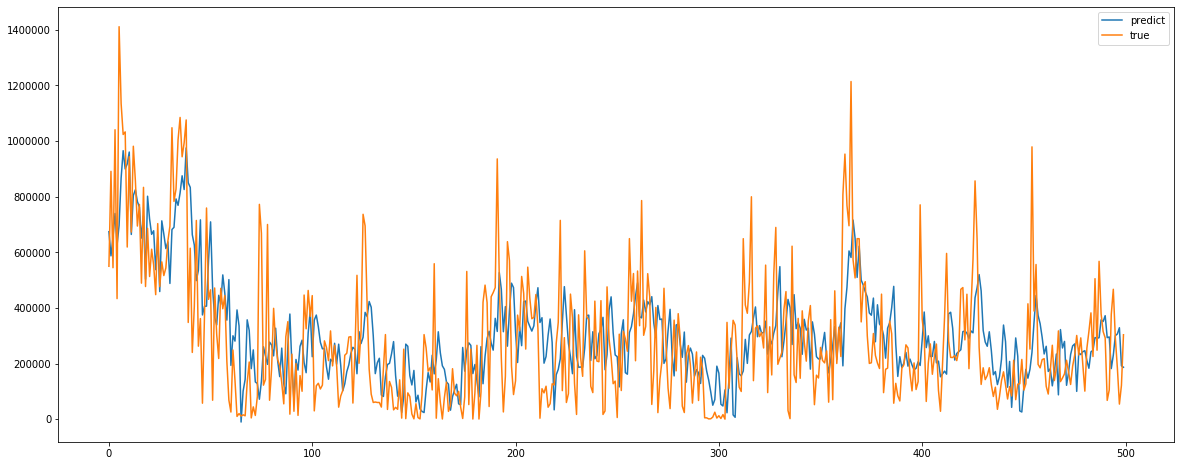

Variance : 0.347
Mean absolute error Train: 144863.293
Mean absolute error Test: 147643.868


In [38]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 2,1,12,1))
testX = np.reshape(testX, (testX.shape[0], 2,1,12,1))
model = Sequential()
#model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(trainX.shape[1],trainX.shape[2],trainX.shape[3], trainX.shape[4])))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_2 (ConvLSTM2D)  (None, 1, 5, 64)          33536     
_________________________________________________________________
flatten_4 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 321       
Total params: 33,857
Trainable params: 33,857
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'loss'])


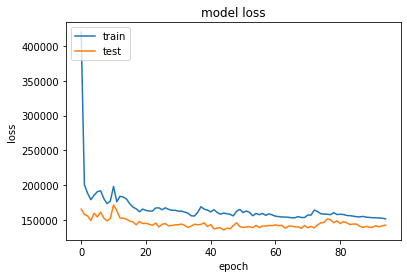

Root mean squared error Train: 194191.117
Root mean squared error Test: 186530.059


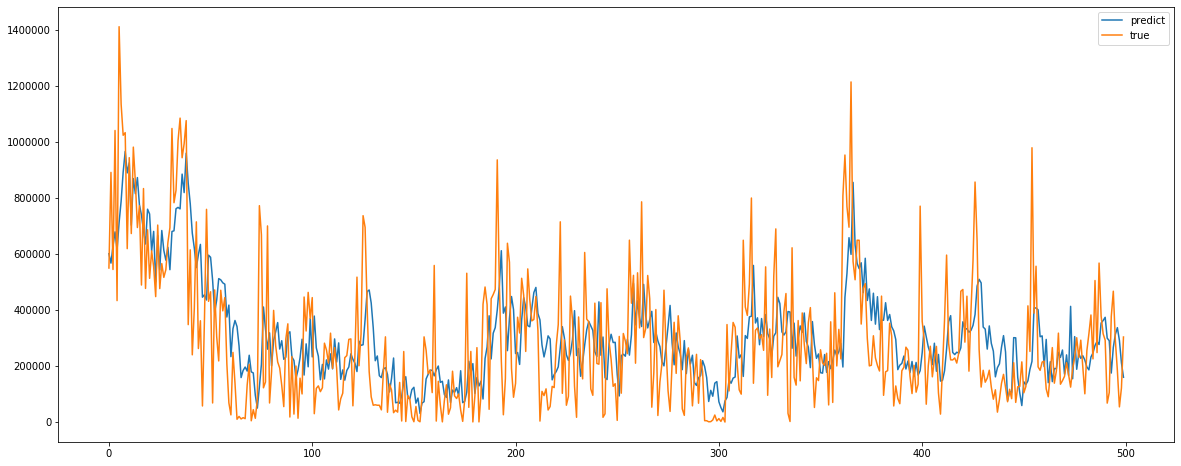

Variance : 0.382
Mean absolute error Train: 151005.154
Mean absolute error Test: 142199.475


In [39]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 4,1,6,1))
testX = np.reshape(testX, (testX.shape[0], 4,1,6,1))
model = Sequential()
#model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(trainX.shape[1],trainX.shape[2],trainX.shape[3], trainX.shape[4])))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_3 (ConvLSTM2D)  (None, 1, 23, 64)         33536     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1472)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 1473      
Total params: 35,009
Trainable params: 35,009
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'loss'])


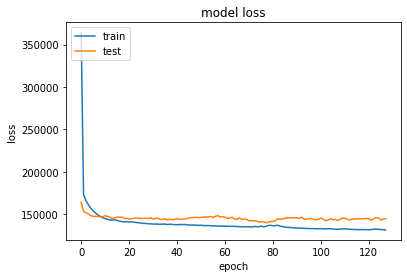

Root mean squared error Train: 176709.048
Root mean squared error Test: 186927.039


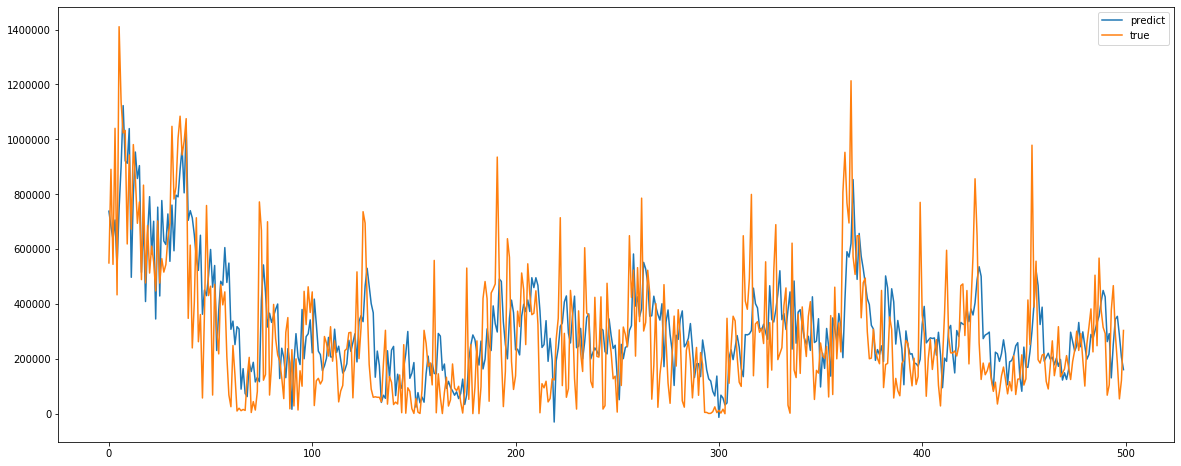

Variance : 0.380
Mean absolute error Train: 131503.596
Mean absolute error Test: 144736.900


In [40]:
from keras.layers import Flatten
from keras.layers import TimeDistributed

from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1,1,24,1))
testX = np.reshape(testX, (testX.shape[0], 1,1,24,1))
model = Sequential()
#model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(trainX.shape[1],trainX.shape[2],trainX.shape[3], trainX.shape[4])))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(24, input_shape=(1, 24), kernel_initializer="glorot_uniform")`
  app.launch_new_instance()
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, kernel_initializer="glorot_uniform")`
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="glorot_uniform")`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1, 24)        0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 1, 24)        600         input_2[0][0]                    
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 1, 12)        300         dense_16[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 1, 36)        0           dense_17[0][0]                   
                                                                 input_2[0][0]                    
__________

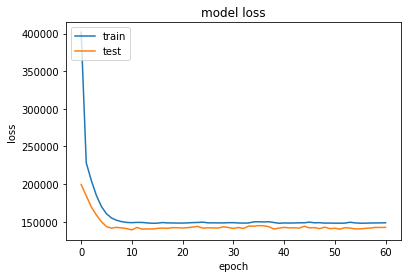

Root mean squared error Train: 194351.462
Root mean squared error Test: 186862.015


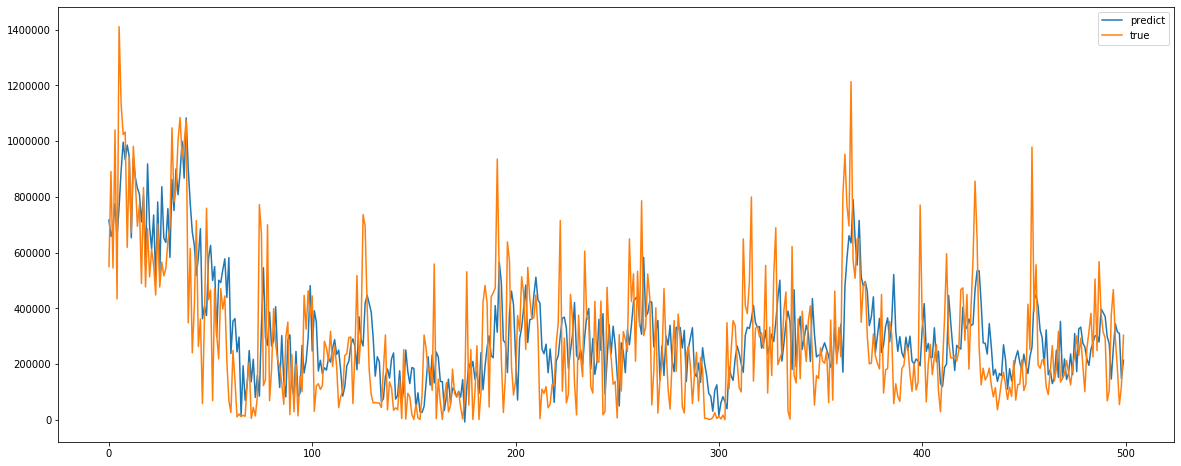

Variance : 0.380
Mean absolute error Train: 151219.063
Mean absolute error Test: 142451.942


In [41]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.models import Model
from keras.layers import LSTM, GRU, SimpleRNN,Flatten ,Input,Add, Concatenate,Reshape
import numpy as np
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1,24))
testX = np.reshape(testX, (testX.shape[0], 1,24))
X_input = Input(shape=(trainX.shape[1], trainX.shape[2]))

layer=Dense(24,init='glorot_uniform', input_shape=(trainX.shape[1], trainX.shape[2]))(X_input)
layer.trainable=False

#layer2=Dense(24,init='glorot_uniform')(layer)
#layer2.trainable=True

layer3=Dense(12,init='glorot_uniform')(layer)
layer3.trainable=True
res=Concatenate(axis=-1)([layer3,X_input])
res.trainable=True
#model.add(res)
flat=Flatten()(res)
layer4=Dense(1,init='glorot_uniform')(flat)
layer4.trainable=True
#model.add(layer4)
model = Model(inputs=X_input, outputs=layer4)
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(24, input_shape=(1, 24), kernel_initializer="glorot_uniform")`
  app.launch_new_instance()
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, kernel_initializer="glorot_uniform")`
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, kernel_initializer="glorot_uniform")`
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="glorot_uniform")`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 1, 24)        0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 1, 24)        600         input_3[0][0]                    
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 1, 12)        300         dense_19[0][0]                   
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 1, 12)        156         dense_20[0][0]                   
__________________________________________________________________________________________________
concatenat

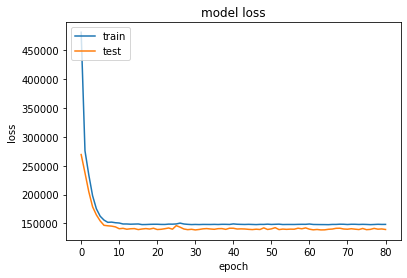

Root mean squared error Train: 190484.263
Root mean squared error Test: 185099.970


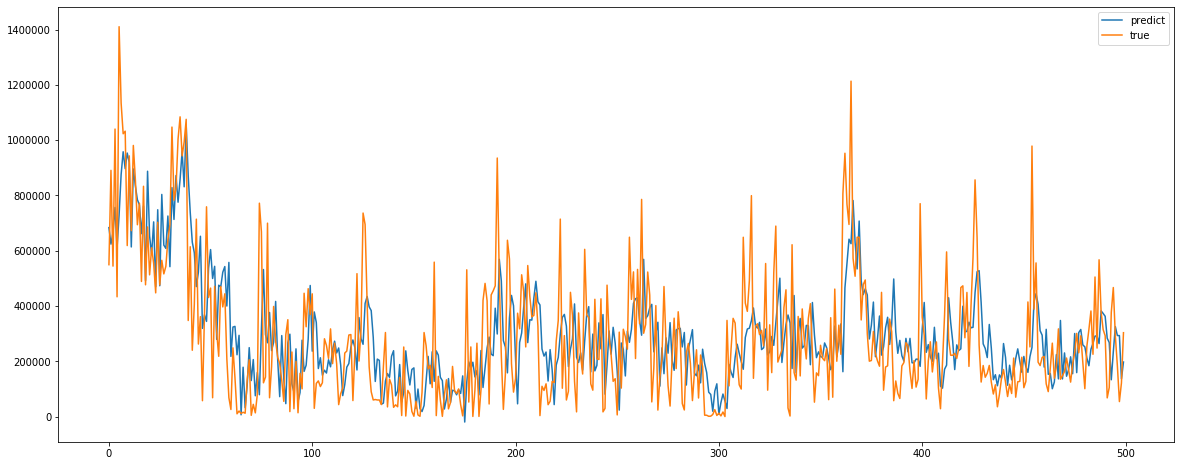

Variance : 0.392
Mean absolute error Train: 147343.714
Mean absolute error Test: 139626.485


In [42]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.models import Model
from keras.layers import LSTM, GRU, SimpleRNN,Flatten ,Input,Add, Concatenate,Reshape
import numpy as np
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1,24))
testX = np.reshape(testX, (testX.shape[0], 1,24))
X_input = Input(shape=(trainX.shape[1], trainX.shape[2]))

layer=Dense(24,init='glorot_uniform', input_shape=(trainX.shape[1], trainX.shape[2]))(X_input)
layer.trainable=False

layer2=Dense(12,init='glorot_uniform')(layer)
layer2.trainable=True
res0=Concatenate(axis=-1)([layer2,X_input])
res0.trainable=True
layer3=Dense(12,init='glorot_uniform')(layer2)
layer3.trainable=True
res=Concatenate(axis=-1)([layer3,X_input])
res.trainable=True
#model.add(res)
flat=Flatten()(res)
layer4=Dense(1,init='glorot_uniform')(flat)
layer4.trainable=True
#model.add(layer4)
model = Model(inputs=X_input, outputs=layer4)
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(24, input_shape=(1, 24), kernel_initializer="glorot_uniform")`
  app.launch_new_instance()
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, kernel_initializer="glorot_uniform")`
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, kernel_initializer="glorot_uniform")`
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="glorot_uniform")`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 1, 24)        0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 1, 24)        600         input_4[0][0]                    
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 1, 12)        300         dense_23[0][0]                   
__________________________________________________________________________________________________
concatenate_6 (Concatenate)     (None, 1, 36)        0           dense_24[0][0]                   
                                                                 input_4[0][0]                    
__________

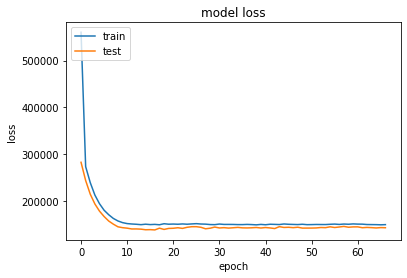

Root mean squared error Train: 193046.131
Root mean squared error Test: 186522.988


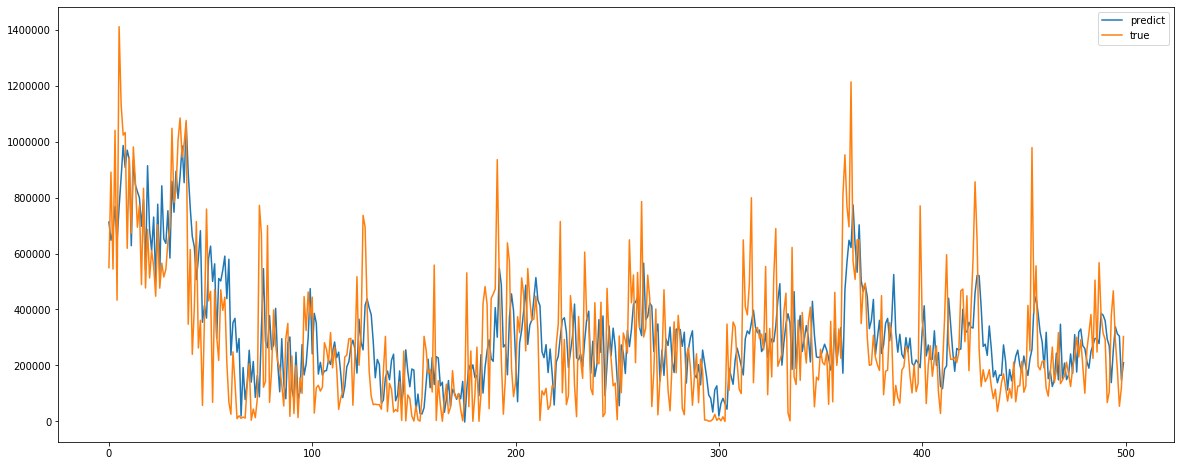

Variance : 0.382
Mean absolute error Train: 150119.498
Mean absolute error Test: 142065.115


In [43]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.models import Model
from keras.layers import LSTM, GRU, SimpleRNN,Flatten ,Input,Add, Concatenate,Reshape
import numpy as np
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1,24))
testX = np.reshape(testX, (testX.shape[0], 1,24))
X_input = Input(shape=(trainX.shape[1], trainX.shape[2]))

layer=Dense(24,init='glorot_uniform', input_shape=(trainX.shape[1], trainX.shape[2]))(X_input)
layer.trainable=False

layer2=Dense(12,init='glorot_uniform')(layer)
layer2.trainable=True
res0=Concatenate(axis=-1)([layer2,X_input])
res0.trainable=True
layer3=Dense(12,init='glorot_uniform')(res0)
layer3.trainable=True
res=Concatenate(axis=-1)([layer3,X_input])
res.trainable=True
#model.add(res)
flat=Flatten()(res)
layer4=Dense(1,init='glorot_uniform')(flat)
layer4.trainable=True
#model.add(layer4)
model = Model(inputs=X_input, outputs=layer4)
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(24, input_shape=(1, 24), kernel_initializer="glorot_uniform")`
  app.launch_new_instance()
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, kernel_initializer="glorot_uniform")`
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, kernel_initializer="glorot_uniform")`
C:\Users\kuruparans\AppData\Local\conda\conda\envs\cps\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="glorot_uniform")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 1, 24)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 1, 24)             600       
_________________________________________________________________
dense_28 (Dense)             (None, 1, 12)             300       
_________________________________________________________________
dense_29 (Dense)             (None, 1, 12)             156       
_________________________________________________________________
flatten_9 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 13        
Total params: 1,069
Trainable params: 1,069
Non-trainable params: 0
_________________________________________________________________
None
dic

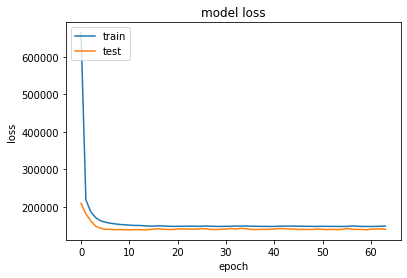

Root mean squared error Train: 191418.665
Root mean squared error Test: 185074.075


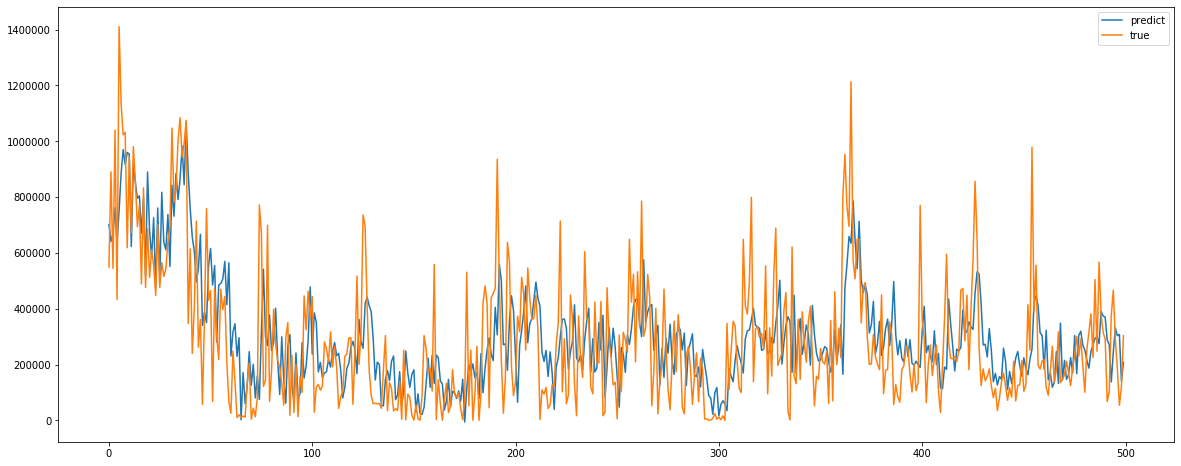

Variance : 0.392
Mean absolute error Train: 148548.364
Mean absolute error Test: 140106.819


In [44]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.models import Model
from keras.layers import LSTM, GRU, SimpleRNN,Flatten ,Input,Add, Concatenate,Reshape
import numpy as np
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1,24))
testX = np.reshape(testX, (testX.shape[0], 1,24))
X_input = Input(shape=(trainX.shape[1], trainX.shape[2]))

layer=Dense(24,init='glorot_uniform', input_shape=(trainX.shape[1], trainX.shape[2]))(X_input)
layer.trainable=True

layer2=Dense(12,init='glorot_uniform')(layer)
layer2.trainable=True
res0=Concatenate(axis=-1)([layer2,X_input])
res0.trainable=True
layer3=Dense(12,init='glorot_uniform')(layer2)
layer3.trainable=True

#model.add(res)
flat=Flatten()(layer3)
layer4=Dense(1,init='glorot_uniform')(flat)
layer4.trainable=True
#model.add(layer4)
model = Model(inputs=X_input, outputs=layer4)
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

In [45]:
#RMSE

1659
537
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 24)             4704      
_________________________________________________________________
lstm_7 (LSTM)                (None, 10)                1400      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 11        
Total params: 6,115
Trainable params: 6,115
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


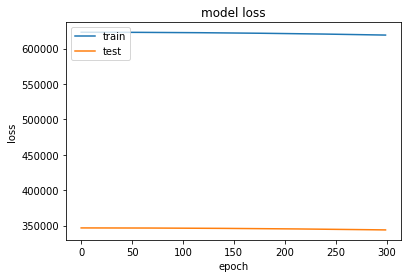

Root mean squared error Train: 622534.060
Root mean squared error Test: 369048.113


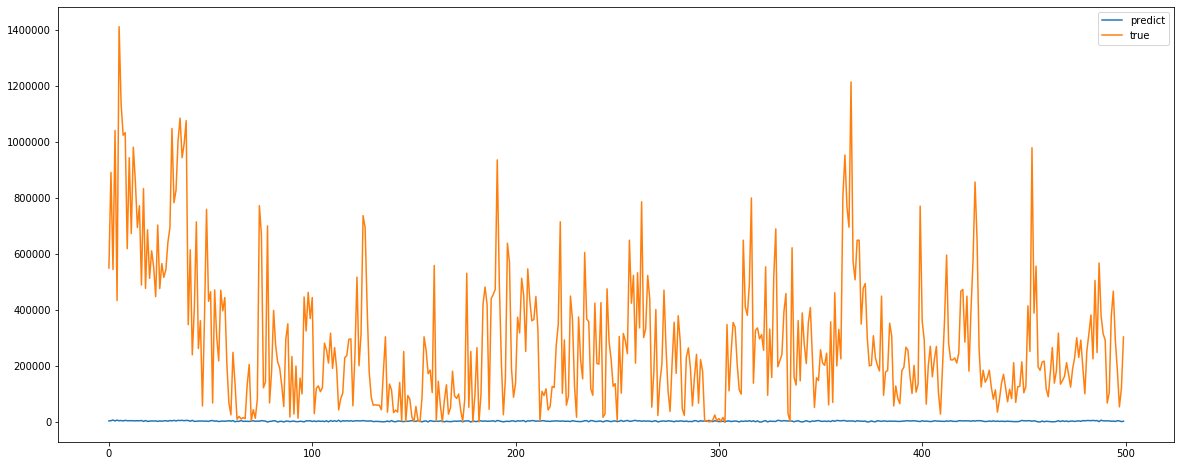

Variance : -1.417
Mean absolute error Train: 584273.449
Mean absolute error Test: 282977.424


In [46]:
''' Re-shaping data for model requirement '''
''' Creating time frames with look backs '''
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model = Sequential()
model.add(LSTM(look_back,return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(10, activation='relu'))

model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 48)                9408      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 49        
Total params: 9,457
Trainable params: 9,457
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


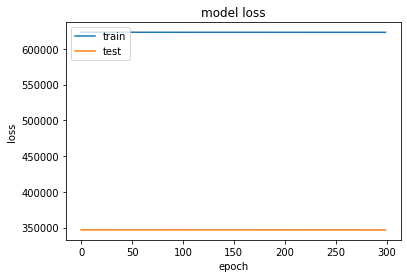

Root mean squared error Train: 626437.844
Root mean squared error Test: 371756.183


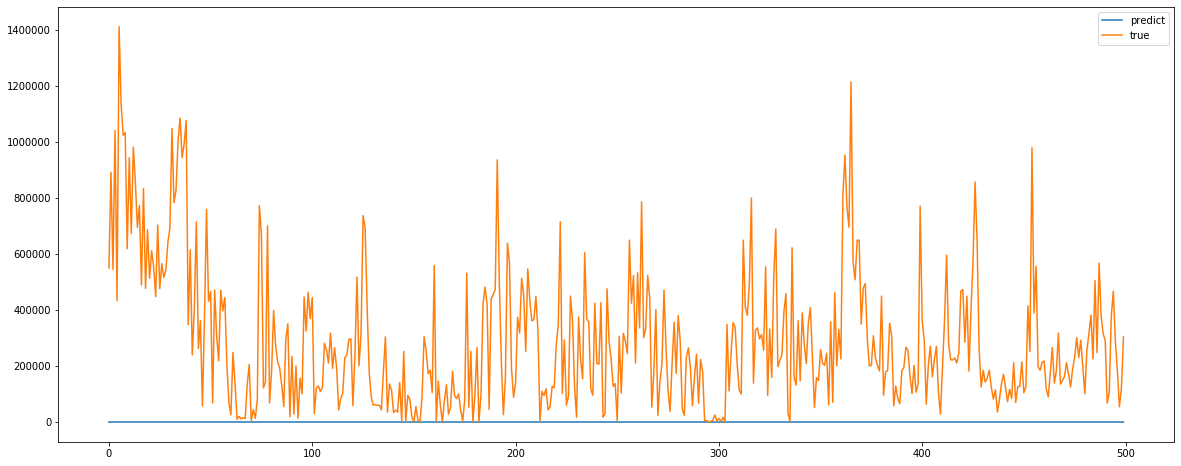

Variance : -1.453
Mean absolute error Train: 588380.378
Mean absolute error Test: 286124.725


In [47]:
model = Sequential()
model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))

model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

1659
537
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, None, 12, 64)      128       
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 6, 64)       0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 384)         0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                87000     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 51        
Total params: 87,179
Trainable params: 87,179
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


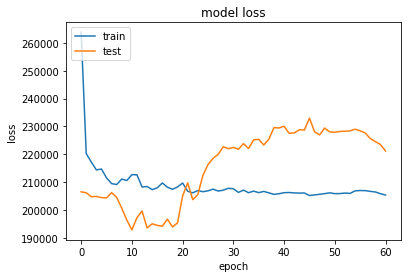

Root mean squared error Train: 216774.207
Root mean squared error Test: 223626.358


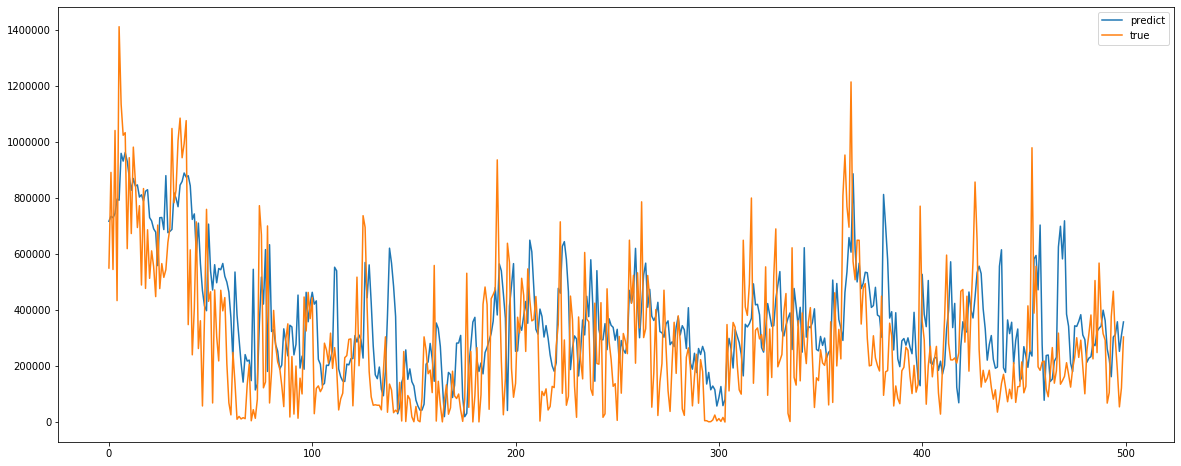

Variance : 0.112
Mean absolute error Train: 170807.794
Mean absolute error Test: 175345.863


In [48]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
''' Re-shaping data for model requirement '''
''' Creating time frames with look backs '''
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 2,12,1))
testX = np.reshape(testX, (testX.shape[0], 2,12,1))
model = Sequential()
#model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'),  input_shape=(None ,trainX.shape[2], trainX.shape[3])))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))

1659
537
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_4 (ConvLSTM2D)  (None, 1, 11, 64)         33536     
_________________________________________________________________
flatten_11 (Flatten)         (None, 704)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 705       
Total params: 34,241
Trainable params: 34,241
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


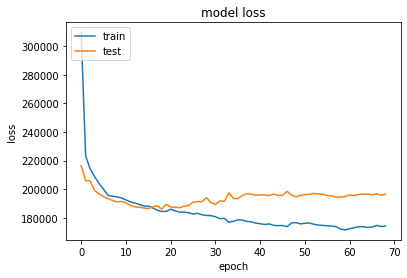

Root mean squared error Train: 173194.587
Root mean squared error Test: 198452.570


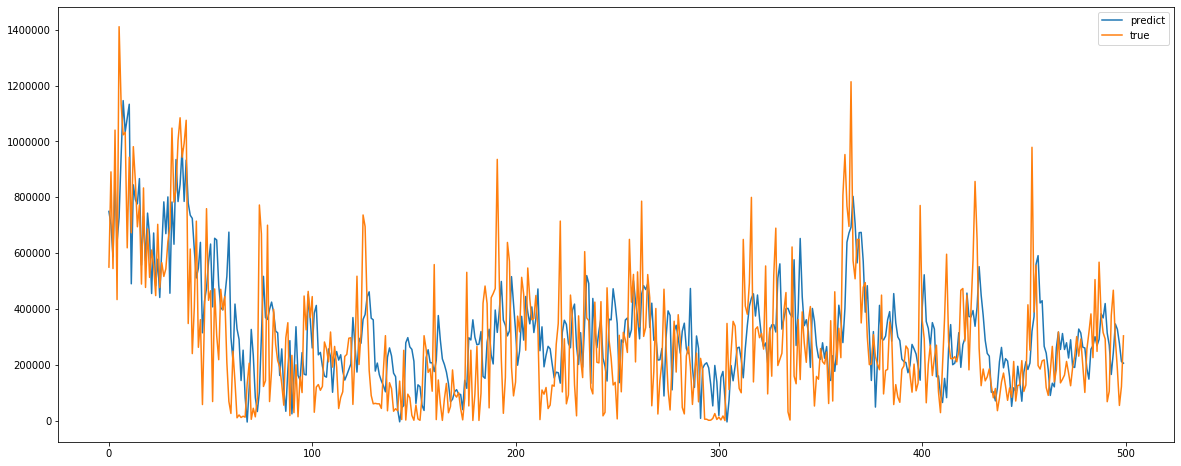

Variance : 0.301
Mean absolute error Train: 133683.018
Mean absolute error Test: 155211.927


In [49]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import ConvLSTM2D
''' Re-shaping data for model requirement '''
''' Creating time frames with look backs '''
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 2,1,12,1))
testX = np.reshape(testX, (testX.shape[0], 2,1,12,1))
model = Sequential()
#model.add(Bidirectional(LSTM(look_back, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(trainX.shape[1],trainX.shape[2],trainX.shape[3], trainX.shape[4])))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])
history = model.fit(trainX, trainY, epochs=300, batch_size=50, validation_data=(testX, testY), verbose=0, shuffle=False,callbacks=[EarlyStopping(monitor='val_loss',patience=50, min_delta=0.01)])
print(model.summary())
# list all data in history
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

yhat_train = model.predict(trainX)
print("Root mean squared error Train: %.3f" % sqrt(mean_squared_error(trainY, yhat_train)))
yhat = model.predict(testX)
print("Root mean squared error Test: %.3f" % sqrt(mean_squared_error(testY, yhat)))
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))
print("Mean absolute error Train: %.3f" % mean_absolute_error(trainY, yhat_train))
print("Mean absolute error Test: %.3f" % mean_absolute_error(testY, yhat))